# <h2 style="color: #51d5a3ff">✉️📩 Spam Detection </h2>

# <img src= "https://img.mobygeek.com/2018/12/14/email-spam-25f5.jpg" width="100%" height="400" />

### 📌 Project Overview

This notebook builds a simple yet effective machine learning model to detect spam messages from text data using supervised learning.

**Workflow:**
- Data cleaning & preprocessing  
- Label encoding  
- Text vectorization (TF-IDF)  
- Model training & evaluation  
- Save best model & vectorizer  

---



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('E:\DEPI\DEPI_Projects\Spam\data\spam.csv', encoding='latin-1')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [31]:
if 'Unnamed: 2' in df.columns:
    df.drop(columns=df.columns[2:], inplace=True)

# Rename columns for clarity
df.columns = ['label', 'message']

In [32]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Preprocessing

In [33]:
# Encode labels: ham = 0, spam = 1
df['target'] = df['label'].map({'ham': 0, 'spam': 1})
df.drop('label', axis=1, inplace=True)


In [34]:
# Check for nulls
df.isnull().sum()

message    0
target     0
dtype: int64

###  Visualize Class Distribution

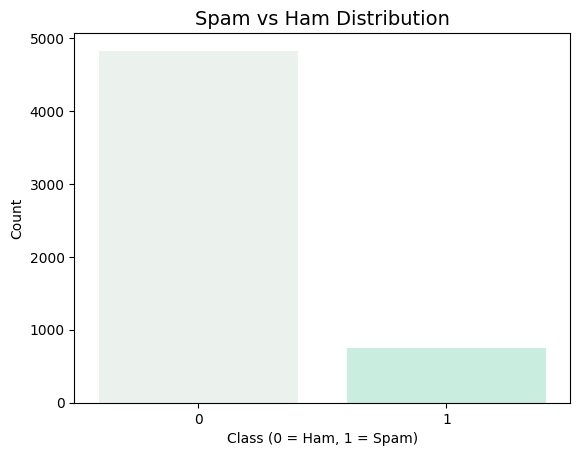

In [35]:
sns.countplot(x='target', data=df,palette=sns.light_palette("#27f3a5ff"))
plt.title("Spam vs Ham Distribution", fontsize=14)
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

### Text Vectorization (TF-IDF)

In [36]:
X = df['message']
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

# Fit and transform
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Model Training

In [37]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n📌 {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


📌 Naive Bayes
Accuracy: 0.9686
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[966   0]
 [ 35 114]]

📌 Logistic Regression
Accuracy: 0.9677
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[966   0]
 [ 36 113]]


###  Model Comparison

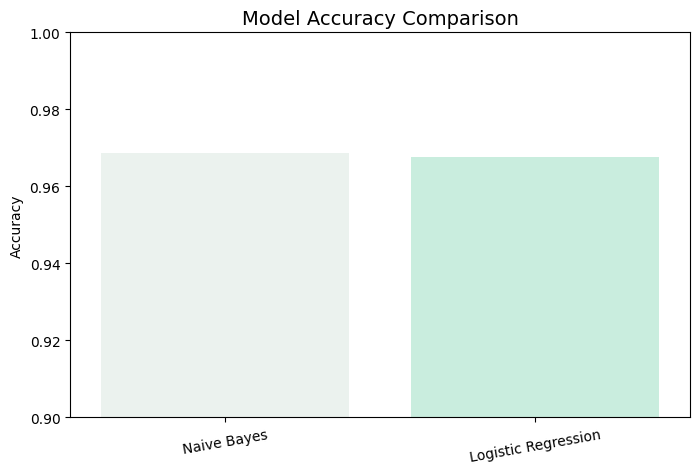

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette=sns.light_palette("#27f3a5ff"))
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.xticks(rotation=10)
plt.show()


### Save the Best Model

In [39]:
best_model = MultinomialNB()
best_model.fit(X_train_vec, y_train)

# Save model and vectorizer
joblib.dump(best_model, "../models/spam_classifier.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")

print("✅ Best model saved to models/spam_classifier.pkl")
print("✅ Vectorizer saved to models/tfidf_vectorizer.pkl")


✅ Best model saved to models/spam_classifier.pkl
✅ Vectorizer saved to models/tfidf_vectorizer.pkl


 ### Conclusion 
- We built a full text classification pipeline to detect spam messages.
- The **Multinomial Naive Bayes** model performed best for this dataset.
- The model and vectorizer are now saved and ready for integration into any deployment system.
 
---